ЛОГІСТИЧНА РЕГРЕСІЯ
1.	Завантажити датасет heart.csv
2.	Зробити попередній аналіз і підготовку даних
3.	Побудувати логістичну регресію
4.	Побудувати графіки функції втрат і точності
5.	Підтвердити розрахунки за допомогою логістичної регресії (модель класичного машинного навчання).
6.	Вивести метрики.
Порівняти результати.
7.	Написати висновки.


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

#Завантаження та огляд даних
uploaded = files.upload()
df = pd.read_csv('heart.csv')
df

Saving heart.csv to heart (6).csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [75]:
#Зробити попередній аналіз і підготовку даних
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [76]:
df.duplicated().sum()

np.int64(3680)

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.30,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.00,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.90,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.00,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75.0,0,582,1,30,1,263358.03,1.83,134,1,0,23,1
4855,73.0,0,582,0,20,0,263358.03,1.83,134,1,1,198,1
4862,45.0,0,220,0,35,0,174000.00,0.80,139,1,1,121,0
4965,40.0,1,129,1,35,0,255000.00,0.90,137,1,0,209,0


In [79]:
TARGET = 'DEATH_EVENT'
FEATURES = [col for col in df.columns if col != TARGET]

cat_features =[col for col in FEATURES if df[col].nunique() < 25]
cont_features =[col for col in FEATURES if df[col].nunique() >= 25]

print(f'Number of categorical features: {len(cat_features)}')
print(f'categorical features:', cat_features, '\n')

print(f'Number of continous features: {len(cont_features)}')
print(f'continous features:', cont_features, '\n')

Number of categorical features: 6
categorical features: ['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking'] 

Number of continous features: 6
continous features: ['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] 



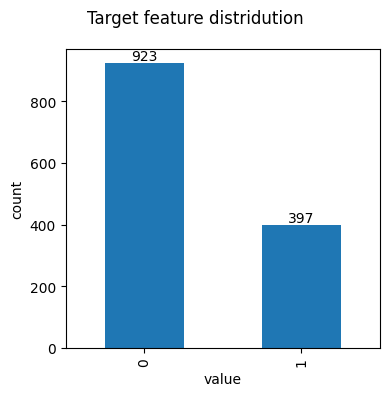

In [80]:
ax = df[TARGET].value_counts().plot(kind='bar', figsize=(4,4))
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel('value')
  ax.set_ylabel('count')

plt.suptitle('Target feature distridution')
plt.tight_layout()
plt.show()

In [81]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,60.587377,0.485606,576.135606,0.446970,37.881818,0.369697,263751.982189,1.356447,136.665909,0.645455,0.307576,132.678788,0.300758
std,11.913538,0.499982,970.630878,0.497368,11.572547,0.482906,106345.010143,0.998924,4.380990,0.478557,0.461665,77.779493,0.458761
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,115.000000,0.000000,30.000000,0.000000,208000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,249.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.300000,140.000000,1.000000,1.000000,206.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [82]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [83]:
df.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [84]:
#Кореляція
correlation_matrix = df.corr()
correlation_with_class = correlation_matrix['DEATH_EVENT']
print(correlation_with_class)

age                         0.224602
anaemia                     0.063510
creatinine_phosphokinase    0.055221
diabetes                   -0.001485
ejection_fraction          -0.271767
high_blood_pressure         0.113721
platelets                  -0.044523
serum_creatinine            0.290229
serum_sodium               -0.250990
sex                         0.044045
smoking                     0.006774
time                       -0.507374
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64


In [85]:
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


In [86]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
log_reg = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(log_reg, param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best parameters:', best_params)

Best parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


In [89]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('Size y_test', y_test.shape)
print('Size y_predt', y_pred.shape)
if y_test.shape[0] == y_pred.shape[0]:
  print('Accuracy:', accuracy_score(y_test, y_pred ))
  print('classification report:\n', classification_report(y_test, y_pred))
else:
  print(f'Size incompatibility: y_test has {y_test.shape[0]} samples, but y_pred has {y_pred.shape[0]} samples.')

Size y_test (264,)
Size y_predt (264,)
Accuracy: 0.8409090909090909
classification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       194
           1       0.70      0.70      0.70        70

    accuracy                           0.84       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.84      0.84      0.84       264



In [90]:
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

random_indices = np.random.choice(results.index, 10, replace=False)
random_results = results.loc[random_indices]

print(random_results)

      True Label  Predicted Label
1160           0                0
1450           0                1
121            0                0
330            0                0
782            0                0
193            0                0
273            0                0
1377           1                0
753            0                0
1475           0                0


In [91]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [92]:
x_train = X_train.T
x_test = X_test.T
y_train = np.expand_dims(y_train.T, 0)
y_test = np.expand_dims(y_test.T,0)
print('X train size', x_train.shape)
print('X test size', x_test.shape)
print('y train size', y_train.shape)
print('y test size', y_test.shape)


X train size (12, 1056)
X test size (12, 264)
y train size (1, 1056)
y test size (1, 264)


In [93]:
def initialize_weights_and_bias(dimension):
  w = np.full((dimension), 0.01)
  b = 0.0
  return w,b

In [94]:
def sigmoid(z):
  y_head = 1/(1+np.exp(-z))
  return y_head

In [95]:
def forward_backward_propagation(w,b,x_train,y_train, eps= 1e-5):
  z = np.dot(w.T,x_train) + b
  y_head = sigmoid(z)
  loss = -1 * y_train * np.log(y_head + eps) - (1 - y_train) * np.log(1 - y_head + eps)
  cost = (np.sum(loss)) / x_train.shape[1]
  derivative_weight = (np.dot(x_train, (y_head - y_train).T)) / x_train.shape[1]
  derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]

  gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
  return cost, gradients

In [96]:
def compute_accuracy(y_head, y_train):
    predictions = (y_head > 0.5).astype(int)
    accuracy = np.mean(predictions == y_train)
    return accuracy

In [97]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    accuracy_list = []
    index = []

    for i in range(number_of_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        y_head = sigmoid(np.dot(w.T, x_train) + b)
        accuracy = compute_accuracy(y_head, y_train)
        cost_list.append(cost)
        accuracy_list.append(accuracy)
        index.append(i)
        w = w - learning_rate * gradients["derivative_weight"].squeeze()
        b = b - learning_rate * gradients["derivative_bias"]

    parameters = {"weight": w, "bias": b}
    plt.figure(figsize=(12, 6))
    plt.subplot(1,2,1)
    plt.plot(index, cost_list, label='Cost')
    plt.xticks(index, rotation='vertical')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.title('losses')

    plt.subplot(1,2,2)
    plt.plot(index, accuracy_list, label='Accuracy', color='red')
    plt.xticks(index, rotation='vertical')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.title('accuracy')
    plt.tight_layout()
    plt.show()
    return parameters, gradients, cost_list, accuracy_list

In [98]:
def predict(w, b, x_test):
  z = sigmoid(np.dot(w.T, x_test)+ b)
  z = z.reshape(1, -1)
  Y_prediction = np.zeros((1, z.shape[1]))
  for i in range(z.shape[1]):
    Y_prediction[0, i] = 1 if z[0,i] > 0.5 else 0
  return Y_prediction

In [99]:
#Побудова логістичної регресії
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list, accuracy_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)
    train_accuracy = np.mean(y_prediction_train == y_train) * 100
    test_accuracy = np.mean(y_prediction_test == y_test) * 100

    print("Train accuracy: {:.2f} %".format(train_accuracy))
    print("Test accuracy: {:.2f} %".format(test_accuracy))

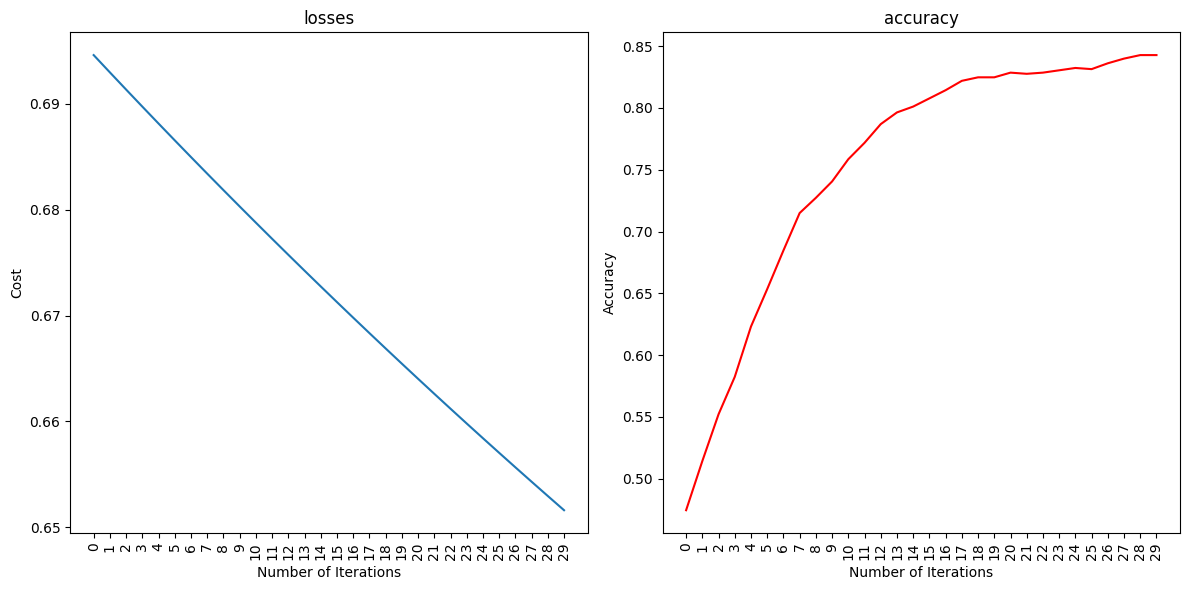

Train accuracy: 84.28 %
Test accuracy: 81.82 %


In [100]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=30)

Висновки:
Після проведення попереднього аналізу та підготовки даних було побудовано логістичну регресію. Отримано очікувані результати: функція втрат зменшується, а точність зростає.